In [149]:
import sys
!{sys.executable} -m jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [2]:
import librosa

In [54]:
filepath = "Downloads/jim2012Chords/Guitar_Only/a/a1.wav"
samples, sampling_rate = librosa.load(filepath, sr=None, mono=True, offset=0.0, duration=None)
len(samples), sampling_rate

(52224, 44100)

In [55]:
duration = len(samples) / sampling_rate
duration

1.18421768707483

In [56]:
from IPython.display import Audio
Audio(filepath)

In [57]:
from matplotlib import pyplot as plt

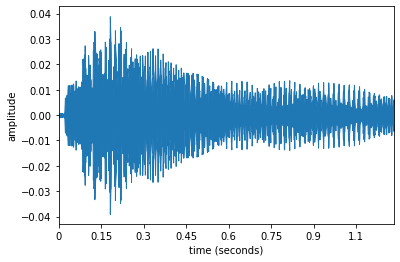

In [58]:
from librosa import display
plt.figure()
librosa.display.waveplot(y=samples, sr=sampling_rate)
plt.xlabel("time (seconds)")
plt.ylabel("amplitude")
plt.show()

In [3]:
import scipy
import numpy as np

In [106]:
def fft_plot(audio, sampling_rate):
    n = len(audio)
    t = 1 / sampling_rate
    print('t is %.3f' % t)
    rb = 1.0 / (2.0 * t)
    print('right bound is %.3f' % rb)
    yf = scipy.fft.fft(audio)
    xf = np.linspace(0.0, rb, n//2)
    fig, ax = plt.subplots()
    ax.plot(xf, np.abs(yf[:n//2]))
    plt.grid()
    plt.xlabel('frequency')
    plt.ylabel('magnitude')
    plt.axis([0, 8000, 0, 140])
    return plt.show()

t is 0.000
right bound is 22050.000


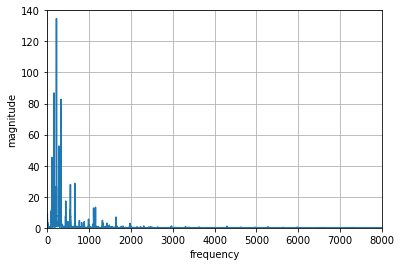

In [107]:
fft_plot(samples, sampling_rate)

In [109]:
n = len(samples)
t = 1 / sampling_rate
yf = scipy.fft.fft(samples)
res = np.abs(yf)[:n//2]
np.max(res)

134.71243

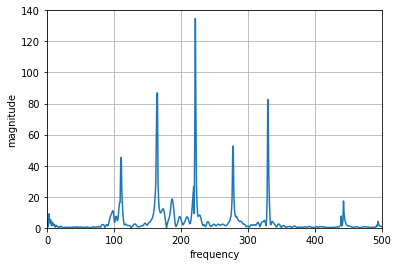

In [111]:
n = len(samples)
t = 1 / sampling_rate
#print('t is %.3f' % t)
rb = 1.0 / (2.0 * t)
#print('right bound is %.3f' % rb)
yf = scipy.fft.fft(samples)
xf = np.linspace(0.0, rb, n//2)
fig, ax = plt.subplots()
ax.plot(xf, np.abs(yf[:n//2]))
plt.grid()
plt.xlabel('frequency')
plt.ylabel('magnitude')
plt.axis([0, 500, 0, 140])
plt.show()

In [117]:
found_frequencies = []
tmp = yf[:n//2]
for _ in range(len(yf)):
    curr_max_index = np.argmax(tmp)
    found_frequencies.append(xf[curr_max_index])
    tmp = np.delete(tmp, curr_max_index)
    if tmp.size == 0:
        break
found_frequencies

[221.25157979395655,
 329.3439546551262,
 276.14223890314423,
 164.6719773275631,
 109.78131821837539,
 163.8275056489602,
 653.621079238635,
 272.7643521887327,
 163.8275056489602,
 108.9368465397725,
 108.09237486116962,
 183.25035425682663,
 183.25035425682663,
 271.07540883152694,
 432.36949944467847,
 157.0717322201371,
 181.56141089962085,
 157.0717322201371,
 156.2272605415342,
 541.306345984451,
 216.18474972233923,
 159.60514725594575,
 155.38278886293133,
 107.24790318256673,
 263.4751637241009,
 185.78376929263527,
 532.8616291984221,
 211.9623913293248,
 184.9392976140324,
 153.69384550572556,
 164.6719773275631,
 1128.2141626134578,
 1084.3016353261078,
 1126.525219256252,
 152.84937382712266,
 531.1726858412163,
 525.2613840909961,
 0.0,
 1615.474321167324,
 162.98303397035733,
 2.533415035808663,
 1079.2348052544903,
 737.2237754203209,
 206.05108957910457,
 91.20294128911186,
 254.1859752594692,
 150.315958791314,
 518.505610662173,
 178.18352418520928,
 624.90904216613

In [28]:
freq_table = [[16, 33, 65, 131, 262, 523, 1047, 2093, 4186],\
             [17, 35, 69, 139, 277, 554, 1109, 2217, 4435],\
             [18, 37, 73, 147, 294, 587, 1175, 2349, 4699],\
             [19, 39, 78, 156, 311, 622, 1245, 2489, 4978],\
             [21, 41, 82, 165, 330, 659, 1319, 2637, 5274],\
             [22, 44, 87, 175, 349, 698, 1397, 2794, 5588],\
             [23, 46, 93, 185, 370, 740, 1480, 2960, 5920],\
             [25, 49, 98, 196, 392, 784, 1568, 3136, 6272],\
             [26, 52, 104, 208, 415, 831, 1661, 3322, 6645],\
             [28, 55, 110, 220, 440, 880, 1760, 3520, 7040],\
             [29, 58, 117, 233, 466, 932, 1865, 3729, 7459],\
             [31, 62, 123, 247, 494, 988, 1976, 3951, 7902]]

In [4]:
notes_labels = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
base_freqs = [16, 17, 18, 19, 21, 22, 23, 25, 26, 28, 29, 31]
freq_table = [[] for _ in range(12)]
notes = 12
octaves = 9
for i in range(notes):
    curr_freq = base_freqs[i]
    for j in range(octaves):
        freq_table[i].append(curr_freq)
        curr_freq *= 2
freq_table

[[16, 32, 64, 128, 256, 512, 1024, 2048, 4096],
 [17, 34, 68, 136, 272, 544, 1088, 2176, 4352],
 [18, 36, 72, 144, 288, 576, 1152, 2304, 4608],
 [19, 38, 76, 152, 304, 608, 1216, 2432, 4864],
 [21, 42, 84, 168, 336, 672, 1344, 2688, 5376],
 [22, 44, 88, 176, 352, 704, 1408, 2816, 5632],
 [23, 46, 92, 184, 368, 736, 1472, 2944, 5888],
 [25, 50, 100, 200, 400, 800, 1600, 3200, 6400],
 [26, 52, 104, 208, 416, 832, 1664, 3328, 6656],
 [28, 56, 112, 224, 448, 896, 1792, 3584, 7168],
 [29, 58, 116, 232, 464, 928, 1856, 3712, 7424],
 [31, 62, 124, 248, 496, 992, 1984, 3968, 7936]]

In [5]:
err_margins = [0, 1]
curr_margin = 2
for _ in range(octaves - 2):
    err_margins.append(curr_margin)
    curr_margin *= 2
err_margins

[0, 1, 2, 4, 8, 16, 32, 64, 128]

In [6]:
def frequency_to_note(freq):
    if freq < 0 or freq > 8000:
        return 'invalid'
    for i in range(notes):
        for j in range(octaves):
            if abs(freq - freq_table[i][j]) <= err_margins[j]:
                return notes_labels[i] + str(j)
    return 'unknown'

In [133]:
found_notes = []
for freq in found_frequencies:
    found_notes.append(frequency_to_note(freq))
found_notes

['A3',
 'E4',
 'C#4',
 'E3',
 'unknown',
 'unknown',
 'unknown',
 'C#4',
 'unknown',
 'unknown',
 'unknown',
 'F#3',
 'F#3',
 'C#4',
 'unknown',
 'unknown',
 'F#3',
 'unknown',
 'unknown',
 'C#5',
 'unknown',
 'unknown',
 'D#3',
 'unknown',
 'C4',
 'F#3',
 'C#5',
 'G#3',
 'F#3',
 'D#3',
 'E3',
 'D6',
 'C#6',
 'D6',
 'D#3',
 'C#5',
 'C5',
 'unknown',
 'G6',
 'unknown',
 'unknown',
 'C#6',
 'F#5',
 'G#3',
 'F#2',
 'C4',
 'D#3',
 'C5',
 'F3',
 'unknown',
 'C5',
 'C4',
 'F#2',
 'D4',
 'C5',
 'F#3',
 'F#3',
 'C4',
 'unknown',
 'unknown',
 'D#3',
 'unknown',
 'G4',
 'G2',
 'F#2',
 'unknown',
 'unknown',
 'unknown',
 'F#3',
 'F3',
 'C5',
 'E3',
 'A#3',
 'G#5',
 'F3',
 'C6',
 'C#4',
 'F#3',
 'G2',
 'C5',
 'E3',
 'C6',
 'B3',
 'unknown',
 'A4',
 'C6',
 'D4',
 'C#3',
 'C5',
 'D#6',
 'C#3',
 'unknown',
 'B4',
 'D3',
 'C5',
 'unknown',
 'unknown',
 'unknown',
 'E2',
 'D#6',
 'unknown',
 'unknown',
 'A#2',
 'B4',
 'unknown',
 'D#2',
 'D5',
 'D5',
 'A#2',
 'unknown',
 'G#3',
 'A5',
 'D#6',
 'unknown

In [41]:
def are_adjacent_notes(first, second):
    if len(first) > 1:
        first = first[:-1]
    if len(second) > 1:
        second = second[:-1]
    return abs(ord(first) - ord(second)) == 1 or first == 'A' and second == 'G' \
           or first == 'G' and second == 'A' or first == second

In [37]:
def check_chord_valid(chord, note_to_add):
    for note in chord:
        if are_adjacent_notes(note, note_to_add):
            return False
    return True

In [38]:
def get_chord_from_notes(notes):
    chord = []
    curr_index = 0
    while len(chord) < 3:
        curr_note = notes[curr_index]
        curr_index += 1
        if curr_note == 'unknown':
            continue
        else:
            curr_note = curr_note[:-1]
        if not curr_note in chord and check_chord_valid(chord, curr_note):
            chord.append(curr_note)
        
    return chord

In [142]:
chord = get_chord_from_notes(found_notes)
chord.sort() # tecnhically doesn't always work like this
chord

['A', 'C#', 'E']

In [8]:
def transform(samples, sampling_rate):
    n = len(samples)
    t = 1 / sampling_rate
    rb = 1.0 / (2.0 * t)
    yf = scipy.fft.fft(samples)
    xf = np.linspace(0.0, rb, n//2)
    return xf, yf

In [15]:
def get_frequencies(xf, yf):
    n = len(yf)
    found_frequencies = []
    tmp = yf[:n//2]
    for _ in range(len(yf)):
        curr_max_index = np.argmax(tmp)
        found_frequencies.append(xf[curr_max_index])
        tmp = np.delete(tmp, curr_max_index)
        if tmp.size == 0:
            break
    return found_frequencies

In [10]:
def get_notes(freqs):
    notes = []
    for f in freqs:
        notes.append(frequency_to_note(f))
    return notes

In [11]:
def get_chord_from_sample(filepath):
    samples, sampling_rate = librosa.load(filepath, sr=None, mono=True, offset=0.0, duration=None)
    xf, yf = transform(samples, sampling_rate)
    freqs = get_frequencies(xf, yf)
    notes = get_notes(freqs)
    return get_chord_from_notes(notes)

In [1]:
from tqdm.notebook import tqdm, trange
import time

for i in trange(200):
    time.sleep(0.01)

  0%|          | 0/200 [00:00<?, ?it/s]

In [43]:
base_dir = "Downloads/jim2012Chords/Guitar_Only/a/"
chords = []
for i in trange(200):
    next_file = base_dir + "a" + str(i+1) + ".wav"
    next_chord = get_chord_from_sample(next_file)
    print(next_chord)
    chords.append(next_chord)

  0%|          | 0/200 [00:00<?, ?it/s]

['A', 'E', 'C#']
['A', 'E', 'C#']
['A', 'E', 'C#']
['E', 'C#', 'A']
['A', 'E', 'C#']
['A', 'C#', 'E']
['A', 'E', 'C#']
['A', 'E', 'C#']
['E', 'A', 'C#']
['E', 'A', 'C#']
['A', 'E', 'C#']
['A', 'C#', 'F']
['E', 'A', 'C#']
['A', 'E', 'C#']
['A', 'C#', 'E']
['E', 'A', 'C#']
['A', 'C#', 'E']
['A', 'E', 'C#']
['E', 'A', 'C#']
['A', 'E', 'C#']
['E', 'A', 'C#']
['E', 'C#', 'A']
['A', 'C#', 'E']
['E', 'A', 'C#']
['C#', 'E', 'A']
['A', 'E', 'C#']
['A', 'E', 'C#']
['A', 'E', 'C#']
['A', 'C#', 'E']
['A', 'E', 'C#']
['E', 'A', 'C#']
['A', 'C#', 'E']
['E', 'A', 'C#']
['A', 'C#', 'E']
['C#', 'G', 'E']
['A', 'E', 'C#']
['A', 'E', 'C#']
['A', 'E', 'C#']
['A', 'E', 'C#']
['A', 'C#', 'E']
['E', 'C#', 'A']
['C#', 'A', 'E']
['A', 'E', 'C#']
['A', 'E', 'C#']
['A', 'C#', 'E']
['A', 'C#', 'E']
['A', 'C#', 'E']
['E', 'C#', 'A']
['A', 'E', 'C#']
['A', 'C#', 'E']
['A', 'C#', 'E']
['A', 'E', 'C#']
['A', 'E', 'C#']
['A', 'C#', 'E']
['A', 'C#', 'E']
['E', 'A', 'C#']
['A', 'E', 'C#']
['E', 'C#', 'A']
['C#', 'E', 'A

In [42]:
get_chord_from_sample("Downloads/jim2012Chords/Guitar_Only/a/a1.wav")

['A', 'E', 'C#']

In [44]:
count = 0
for chord in chords:
    if 'A' in chord and 'C#' in chord and 'E' in chord:
        count += 1
count / len(chords) * 100

94.0